In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Import the datset from UCI

In [2]:
!pip3 install -U ucimlrepo
from ucimlrepo import fetch_ucirepo

In [3]:
# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
diabetes_df = cdc_diabetes_health_indicators.data.features
diabetes_df['Diabetes_binary'] = cdc_diabetes_health_indicators.data.targets



diabetes_df[diabetes_df['BMI'] > 95]
diabetes_df.info()
#plt.plot(X['Income'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

/tmp/ipython-input-3-3180354582.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_df['Diabetes_binary'] = cdc_diabetes_health_indicators.data.targets


In [6]:
diabetes_df.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875,0.139333
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148,0.346294
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,0.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


split histogram of sex and diabetes

<function matplotlib.pyplot.show(close=None, block=None)>

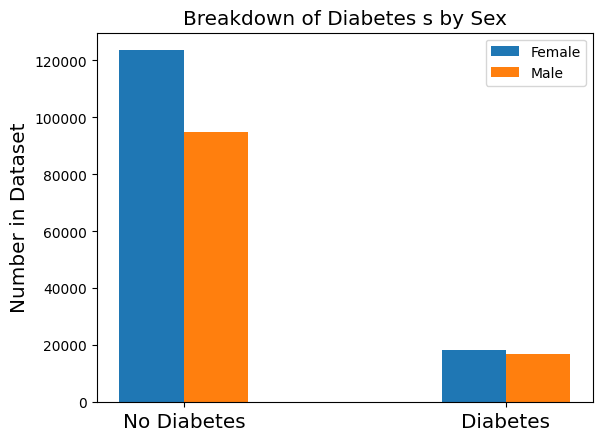

In [16]:
diabetes_female = diabetes_df[diabetes_df['Sex'] == 0]
diabetes_male = diabetes_df[diabetes_df['Sex'] == 1]

plt.bar([-0.1, 0.9], diabetes_female['Diabetes_binary'].value_counts(), label = 'Female', width = 0.2)
plt.bar([0.1, 1.1], diabetes_male['Diabetes_binary'].value_counts(), label = 'Male', width = 0.2)

plt.legend()
plt.ylabel('Number in Dataset', fontsize = 'x-large')
plt.title('Breakdown of Diabetes s by Sex', fontsize = 'x-large')
plt.xticks(ticks = [0, 1], labels = ['No Diabetes', 'Diabetes'], fontsize = 'x-large')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

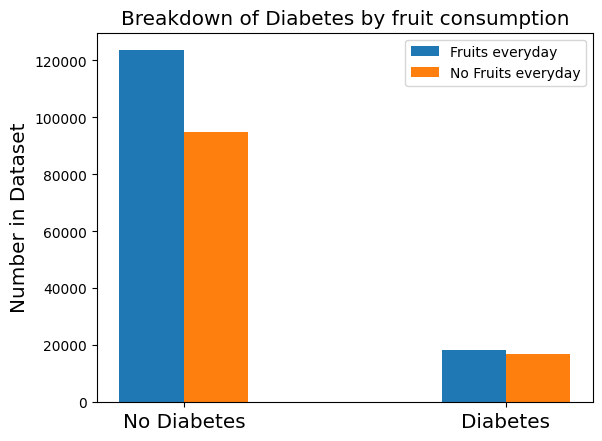

In [17]:
#Fruits and diabetes
diabetes_fruits = diabetes_df[diabetes_df['Fruits'] == 0]
diabetes_no_fruits = diabetes_df[diabetes_df['Fruits'] == 1]

plt.bar([-0.1, 0.9], diabetes_female['Diabetes_binary'].value_counts(), label = 'Fruits everyday', width = 0.2)
plt.bar([0.1, 1.1], diabetes_male['Diabetes_binary'].value_counts(), label = 'No Fruits everyday', width = 0.2)

plt.legend()
plt.ylabel('Number in Dataset', fontsize = 'x-large')
plt.title('Breakdown of Diabetes by fruit consumption', fontsize = 'x-large')
plt.xticks(ticks = [0, 1], labels = ['No Diabetes', 'Diabetes'], fontsize = 'x-large')

plt.show

(array([13298., 11123., 13823., 16157., 19819., 57146., 33244., 32194.,
        23533., 33343.]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ]),
 <BarContainer object of 10 artists>)

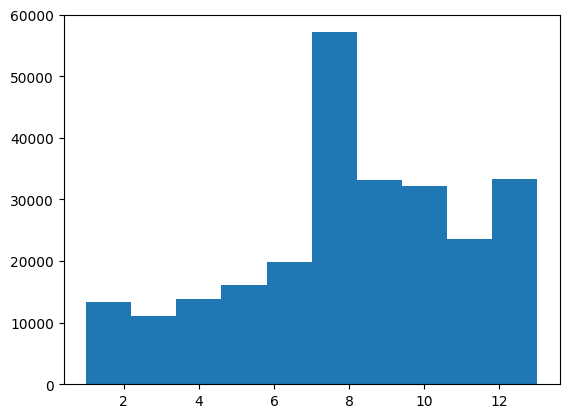

In [18]:
plt.hist(diabetes_df['Age'])

(array([ 9811., 11783., 15994.,     0., 20135., 25883.,     0., 36470.,
        43219., 90385.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

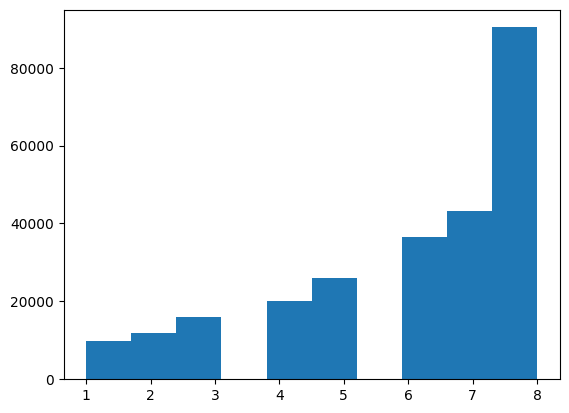

In [22]:
plt.hist(diabetes_df['Income'])
#potential bias in that people of higher income are unequally represented

(array([141257.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 112423.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

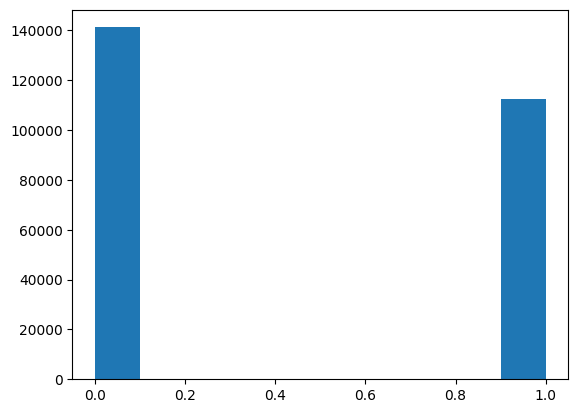

In [24]:
plt.hist(diabetes_df["Smoker"])
#fairly equally distributed

(array([1.34220e+04, 1.52407e+05, 6.78060e+04, 1.59760e+04, 2.71200e+03,
        6.64000e+02, 1.72000e+02, 2.42000e+02, 2.25000e+02, 5.40000e+01]),
 array([12. , 20.6, 29.2, 37.8, 46.4, 55. , 63.6, 72.2, 80.8, 89.4, 98. ]),
 <BarContainer object of 10 artists>)

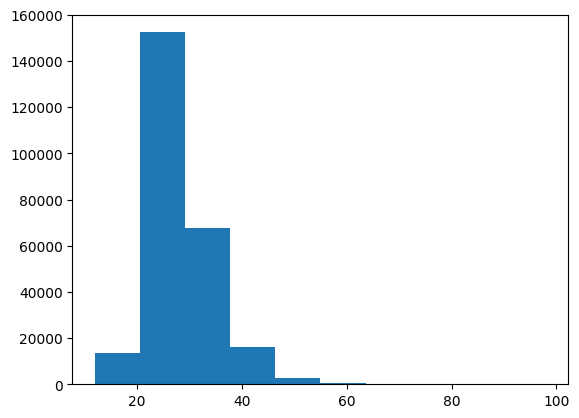

In [25]:
plt.hist(diabetes_df['BMI'])